In [2]:
import math
import time
import matplotlib.pyplot as plt

In [3]:
Load = {
    0: 2500,
    1: 2000,
    2: 1500,
    3: 1300,
    4: 1300,
    5: 1800,
    6: 2000,
    7: 2500,
    8: 3500,
    9: 5000,
    10: 6500,
    11: 6500,
    12: 6500,
    13: 6300,
    14: 6000,
    15: 5500,
    16: 4500,
    17: 5500,
    18: 5000,
    19: 5200,
    20: 5000,
    21: 4800,
    22: 4600,
    23: 3000
}

In [4]:
TIME = 0

In [5]:
solar_production = [7000 * math.cos(i/4) if math.cos(i/4) > 0 else 0 for i in range(-12,12)]

In [6]:
wind_production = 500

In [7]:
thermal_max = 10000

In [8]:
hydro_max = 25000

```
while 1:
    load = Load[TIME]
    renewable_production = solar_production[TIME] + wind_production
    if renewable_production > load :
        battery += renewable_production - load
        thermal_production = 0


\begin{equation}
Gen_{renewable} = \sum \; solar, hydro, wind,..
\end{equation}

\begin{equation}
f(x) = 
\begin{cases}
g(x) & Load < Max_{gen}\\
h(x) & Load > Max_{gen}\\
\end{cases}
\end{equation}

\begin{equation}
g(x) = 
\begin{cases}
renewables \rightarrow Load, \; excess \rightarrow battery & Gen_{renewable} > Load\\
renewables \rightarrow Load & Gen_{renewable} = Load\\
battery \rightarrow Load, \;thermal \rightarrow Load & Gen_{renewable} < Load, battery \neq 0\\
peaker\; generation \rightarrow Load, \; thermal \rightarrow Load & Gen_{renewable} < Load, battery = 0\\
\end{cases}
\end{equation}

\begin{equation}
h(x) = import \leftarrow \{Load - g(x)\}
\end{equation}

\begin{equation}
f(x) = 
\begin{cases}
g(x) & Load < Max_{gen}\\
h(x) & Load > Max_{gen}\\
\end{cases}
\end{equation}

In [19]:
TIME = 0
battery = 0
total_thermal_production = 0
other_country = 0

solar_usage = []
thermal_usage = []
battery_usage = []
other_country_use = []

while 1:
    load = Load[TIME]
    
    renewable_production = solar_production[TIME] + wind_production
    
    if renewable_production > load :
        battery += renewable_production - load
        thermal_production = 0
        
        
        
        
        thermal_usage.append(thermal_production)
        battery_usage.append(battery)
        solar_usage.append(solar_production[TIME])
        other_country_use.append(0)
    
    else: #renewable_production < load:
        
        if battery != 0:
            
            total_power = battery + renewable_production
            
            if load - total_power > 0:
                load = load - total_power
                battery = 0
                
                thermal_production = load - renewable_production
                if thermal_production > thermal_max:
                    other_country = thermal_production - thermal_max
                    other_country_use.append(other_country_use)
                else:
                    other_country_use.append(0)
                    
                    
                    
                total_thermal_production += thermal_production
                
                
                
                battery_usage.append(battery)
                thermal_usage.append(thermal_production)
                solar_usage.append(solar_production[TIME])
                
                
            
            else:
                battery = total_power - load
                load = 0
                
                
                battery_usage.append(battery)
                thermal_usage.append(0)
                solar_usage.append(solar_production[TIME])
                other_country_use.append(0)
                
                
                
        else:        
            thermal_production = load - renewable_production
            if thermal_production > thermal_max:
                other_country = thermal_production - thermal_max
                other_country_use.append(other_country)
            else:
                other_country_use.append(0)
                
            total_thermal_production += thermal_production
        
        
        
        
            thermal_usage.append(thermal_production)
            battery_usage.append(0)
            solar_usage.append(solar_production[TIME])
        
        
        
        '''if battery != 0:
            load -= battery
            if load < 0:
                battery += load
            else:
                thermal_production = load - renewable_production
                if thermal_production > thermal_max:
                    other_country += thermal_production - thermal_max
                total_thermal_production += thermal_production
        '''    
        
        
    
    
    TIME += 1
    time.sleep(0.2)
    
    print("TIME                       :", TIME-1)
    print("Load                       :", Load[TIME-1])
    print("Renewable                  :", renewable_production)
    print("Thermal                    :", thermal_production)
    print("Battery                    :", battery)
    print("Other                      :", other_country)
    print("======================================")
    
    if TIME == 24:
        break

TIME                       : 0
Load                       : 2500
Renewable                  : 500
Thermal                    : 2000
Battery                    : 0
Other                      : 0
TIME                       : 1
Load                       : 2000
Renewable                  : 500
Thermal                    : 1500
Battery                    : 0
Other                      : 0
TIME                       : 2
Load                       : 1500
Renewable                  : 500
Thermal                    : 1000
Battery                    : 0
Other                      : 0
TIME                       : 3
Load                       : 1300
Renewable                  : 500
Thermal                    : 800
Battery                    : 0
Other                      : 0
TIME                       : 4
Load                       : 1300
Renewable                  : 500
Thermal                    : 800
Battery                    : 0
Other                      : 0
TIME                       : 5
L

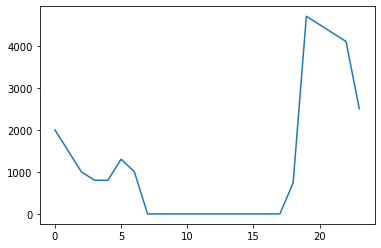

In [20]:
plt.plot(thermal_usage)

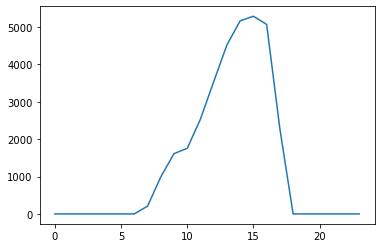

In [21]:
plt.plot(battery_usage)

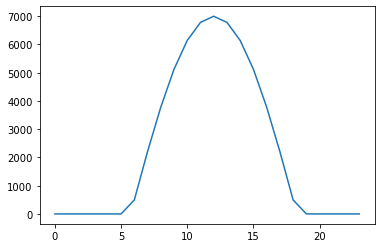

In [23]:
plt.plot(solar_production)

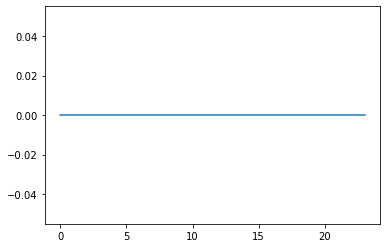

In [22]:
plt.plot(other_country_use)

In [9]:
total_thermal_production

29241.199474642784

In [12]:
Load[22]

4600

1 -> Generator<br>
2 -> Load<br>
3 -> Other<br>

In [208]:
import time

In [209]:
node_counter = 0
speed = 1

In [210]:
class Generator:
    def __init__(self, name, max_production, unit = 'kw'):
        self.name = name
        self.max_production = max_production
        self.unit = unit
        self.on = False
        self.current_production = 0
        self.connected = False
        self.to = None
        self.type = "Gen"
        
        
        
        self.run_timer = False
        self.start_time = 0
        self.end_time = 0
        self.running_time = 0
        
    
    def On(self):     
        self.on = True        
    
    def Off(self):
        
        self.on = False
        self.current_production = 0
        
        self.run_timer = False
        self.end_time = time.time()
        
        self.running_time += self.end_time - self.start_time
        
    def get_power(self, wattage):
        self.On()
        self.current_production = wattage
        
    def connect(self, obj):
        
        if type(obj) == Generator:
            print("not a load or node")
            return
        
        if type(obj) == Load:
            self.connected = True
            self.to = obj
        
            obj.connected_in = True
            obj.inlet = self
            return
        
        if type(obj) == Node:
            self.connected = True
            self.to = obj
            
            obj.connected_in = True
            obj.inlet.append(self)
        
    def supply(self, wattage):
        if not self.connected:
            print("No connection attached")
            return
        
        demand = wattage
        
        if demand > self.max_production:
            print("Resources not enough")
            return
        
        if not self.run_timer:
            self.run_timer = True
            self.start_time = time.time()
        
        self.current_production = demand
        
        
        
        
        
    def desc(self):
        print('name               : ', self.name)
        print('max production     : ', self.max_production, self.unit)
        print('is on              : ', self.on)
        print('current production : ', self.current_production)
        print('connected          : ', self.connected)
        if self.connected:
            print('connected to       : ', self.to.name)
            
            
    def runtime(self):
        print('runtime            : ', self.running_time)
        print('start time         : ', self.start_time)
        print('end time           : ', self.end_time)
        print('demand             : ', self.current_production)
        

In [211]:
class Load:
    def __init__(self, name, demand, unit = 'kw'):
        self.name = name
        self.demand = demand
        self.unit = unit
        self.connected_in = False
        self.connected_out = False
        self.inlet = None
        self.outlet = None
        self.connected_gen = False
        self.blackout = False
        
    def Demand(self, wattage):
        self.demand = wattage
    
    def connect_in(self, obj):
        self.connected_in = True
        self.inlet = obj
        
        if type(obj) == Generator:
            obj.connected = True
            obj.to = self
            obj.connected_gen = True
        
        
    def connect_out(self, obj):
        self.connected_out = True
        self.outlet = obj
        
        
    def breakdown(self):
        self.blackout = True
          
    
        
    def desc(self):
        print('name               : ', self.name)
        print('demand             : ', self.demand, self.unit)
        print('inlet connected    : ', self.connected_in)
        if self.connected_in:
            print('inlet              : ', self.inlet.name)
        print('outlet connected   : ', self.connected_out)
        if self.connected_out:
            print('outlet             : ', self.outlet.name)

In [212]:
class Node:
    def __init__(self):
        global node_counter
        node_counter += 1
        self.name = 'Node'+str(node_counter)
        self.connected_in = False
        self.inlet = []
        self.connected_out = False
        self.outlet = []
        self.demnad = 0
        self.max_production = 0
        self.current_production = 0
        
    def connect_in(self, obj):
        
        if type(obj) == Load:
            print("You cannot connect load to inlet")
            return
        
        self.connected_in = True
        self.inlet.append(obj)
        
        if type(obj) == Generator:
            obj.to = self
            obj.connected = True
            return
            
        if type(obj) == Node:
            obj.connected_out = True
            obj.outlet.append(self)
            return
        
        
    def connect_out(self, obj):
        
        if type(obj) == Generator:
            print("You cannot connect Generator to outlet")
            return
        
        
        self.connected_out = True
        self.outlet.append(obj)
        
        
        if type(obj) == Load:
            obj.connected_in = True
            obj.inlet = self
            return
        
        if type(obj) == Node:
            obj.connected_in = True
            obj.inlet.append(self)
        
        
        
        
    def desc(self):
        print('name               : ', self.name)
        #print('demand             : ', self.demand, self.unit)
        print('inlet connected    : ', self.connected_in)
        if self.connected_in:
            print('inlet              : ', self.inlet)
        print('outlet connected   : ', self.connected_out)
        if self.connected_out:
            print('outlet             : ', self.outlet)

In [213]:
class Battery:
    def __init__(self, name, capacity):
        self.name = name
        self.capacity = capacity
        self.connected_in = False
        self.inlet = None
        self.connected_out = False
        self.outlet = None
        
    def connect_in(self, obj):
        
        if type(obj) == Load:
            print("you cannot attach load to battery")
            return
        
        if type(obj) == Generator:
            self.connected_in = True
            self.inlet = obj
            
            obj.to = self
            obj.connected = True
        
        if type(obj) == Node:
            self.connected_in = True
            self.outlet = obj
            
            obj.outlet.append(self)
            

In [214]:
Thermal = Generator("Thermal", 7000)
Solar = Generator("Solar", 2500)
City = Load("City", 3000)

In [215]:
Thermal.connect(City)
Thermal.desc()

name               :  Thermal
max production     :  7000 kw
is on              :  False
current production :  0
connected          :  True
connected to       :  City


ONE GENERATOR AND ONE LOAD

In [216]:
val = {
    0: 2500,
    1: 2000,
    2: 1500,
    3: 1300,
    4: 1300,
    5: 1800,
    6: 2000,
    7: 2500,
    8: 3500,
    9: 5000,
    10: 6500,
    11: 6500,
    12: 6500,
    13: 6300,
    14: 6000,
    15: 5500,
    16: 4500,
    17: 5500,
    18: 5000,
    19: 5200,
    20: 5000,
    21: 4800,
    22: 4600,
    23: 3000
}

In [217]:
Thermal.desc()

name               :  Thermal
max production     :  7000 kw
is on              :  False
current production :  0
connected          :  True
connected to       :  City


In [218]:
Thermal.desc()

name               :  Thermal
max production     :  7000 kw
is on              :  False
current production :  0
connected          :  True
connected to       :  City


Thermal to Direct Load

In [219]:
Time = 0
while True:
    
    Thermal.supply(val[Time])
    
    supply = Thermal.current_production
    demand = val[Time]
    
    if (supply - demand)/demand > 0.1:
        print("too much supply")
        break
    if (supply - demand)/demand < -0.1:
        print("too little supply")
        break
    
    if Time == 23:
        break
    
    time.sleep(1)
    Time += 1
    
Thermal.Off()
Thermal.runtime()

runtime            :  23.131872415542603
start time         :  1626971639.1138537
end time           :  1626971662.245726
demand             :  0


Thermal, solar, load

In [180]:
n1 = Node()

In [181]:
Thermal.connect(n1)

In [182]:
Solar.connect(n1)

In [183]:
n1.connect_out(City)

In [184]:
n1.desc()

name               :  Node3
inlet connected    :  True
inlet              :  [<__main__.Generator object at 0x000001AAFFC8B7F0>, <__main__.Generator object at 0x000001AAFFC8BF70>]
outlet connected   :  True
outlet             :  [<__main__.Load object at 0x000001AAFFC8B850>]


In [203]:
Time = 0
while True:
    
    solar_production = Solar.max_production
    demand = val[Time]
    
    if (solar_production - demand)/ demand > 0.1:
        print("too much supply")
    if (solar_production - demand)/ demand < -0.1:
        print("too little supply")
        loan = demand - solar_production
        Thermal.supply(loan)
        print("total supply ", Thermal.current_production, solar_production, demand)
    if Time == 23:
        break
    
    
    time.sleep(0.1)
    Time += 1

too much supply
too much supply
too much supply
too much supply
too much supply
too much supply
too little supply
total supply  1000 2500 3500
too little supply
total supply  2500 2500 5000
too little supply
total supply  4000 2500 6500
too little supply
total supply  4000 2500 6500
too little supply
total supply  4000 2500 6500
too little supply
total supply  3800 2500 6300
too little supply
total supply  3500 2500 6000
too little supply
total supply  3000 2500 5500
too little supply
total supply  2000 2500 4500
too little supply
total supply  3000 2500 5500
too little supply
total supply  2500 2500 5000
too little supply
total supply  2700 2500 5200
too little supply
total supply  2500 2500 5000
too little supply
total supply  2300 2500 4800
too little supply
total supply  2100 2500 4600
too little supply
total supply  500 2500 3000


In [221]:
Thermal.desc()

name               :  Thermal
max production     :  7000 kw
is on              :  False
current production :  0
connected          :  True
connected to       :  City


In [222]:
n = Node()

In [223]:
Thermal.connect(n)

In [224]:
Thermal.desc()

name               :  Thermal
max production     :  7000 kw
is on              :  False
current production :  0
connected          :  True
connected to       :  Node1


In [225]:
n.desc()

name               :  Node1
inlet connected    :  True
inlet              :  [<__main__.Generator object at 0x000001AAC35D4700>]
outlet connected   :  False


In [226]:
n.connect_out(City)

In [227]:
n.desc()

name               :  Node1
inlet connected    :  True
inlet              :  [<__main__.Generator object at 0x000001AAC35D4700>]
outlet connected   :  True
outlet             :  [<__main__.Load object at 0x000001AAC35D4760>]


In [228]:
Solar.connect(n)

In [229]:
n.desc()

name               :  Node1
inlet connected    :  True
inlet              :  [<__main__.Generator object at 0x000001AAC35D4700>, <__main__.Generator object at 0x000001AA8844A340>]
outlet connected   :  True
outlet             :  [<__main__.Load object at 0x000001AAC35D4760>]


In [230]:
City.desc()

name               :  City
demand             :  3000 kw
inlet connected    :  True
inlet              :  Node1
outlet connected   :  False
